## Data Preprocessing and Exploration



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Data Loading

In [2]:
ctg = pd.read_csv('ctg.csv', sep=';')

### Analysis of Data

In [3]:
ctg.head()

,LB,AC,FM,UC,ASTV,MSTV,ALTV,MLTV,DL,DS,DP,Width,Min,Max,Nmax,Nzeros,Mode,Mean,Median,Variance,Tendency,CLASS,NSP
0,120.0,0.0,0.0,0.0,73.0,0.5,43.0,2.4,0.0,0.0,0.0,64.0,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,9.0,2.0
1,132.0,4.0,0.0,4.0,17.0,2.1,0.0,10.4,2.0,0.0,0.0,130.0,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,6.0,1.0
2,133.0,2.0,0.0,5.0,16.0,2.1,0.0,13.4,2.0,0.0,0.0,130.0,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,6.0,1.0
3,134.0,2.0,0.0,6.0,16.0,2.4,0.0,23.0,2.0,0.0,0.0,117.0,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,6.0,1.0
4,132.0,4.0,0.0,5.0,16.0,2.4,0.0,19.9,0.0,0.0,0.0,117.0,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,2.0,1.0


In [4]:
ctg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2129 entries, 0 to 2128
Data columns (total 23 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   LB        2126 non-null   float64
 1   AC        2126 non-null   float64
 2   FM        2127 non-null   float64
 3   UC        2127 non-null   float64
 4   ASTV      2127 non-null   float64
 5   MSTV      2127 non-null   float64
 6   ALTV      2127 non-null   float64
 7   MLTV      2127 non-null   float64
 8   DL        2128 non-null   float64
 9   DS        2128 non-null   float64
 10  DP        2128 non-null   float64
 11  Width     2126 non-null   float64
 12  Min       2126 non-null   float64
 13  Max       2126 non-null   float64
 14  Nmax      2126 non-null   float64
 15  Nzeros    2126 non-null   float64
 16  Mode      2126 non-null   float64
 17  Mean      2126 non-null   float64
 18  Median    2126 non-null   float64
 19  Variance  2126 non-null   float64
 20  Tendency  2126 non-null   floa

1. Here we plot the pair plot graph to view the relationship between important features

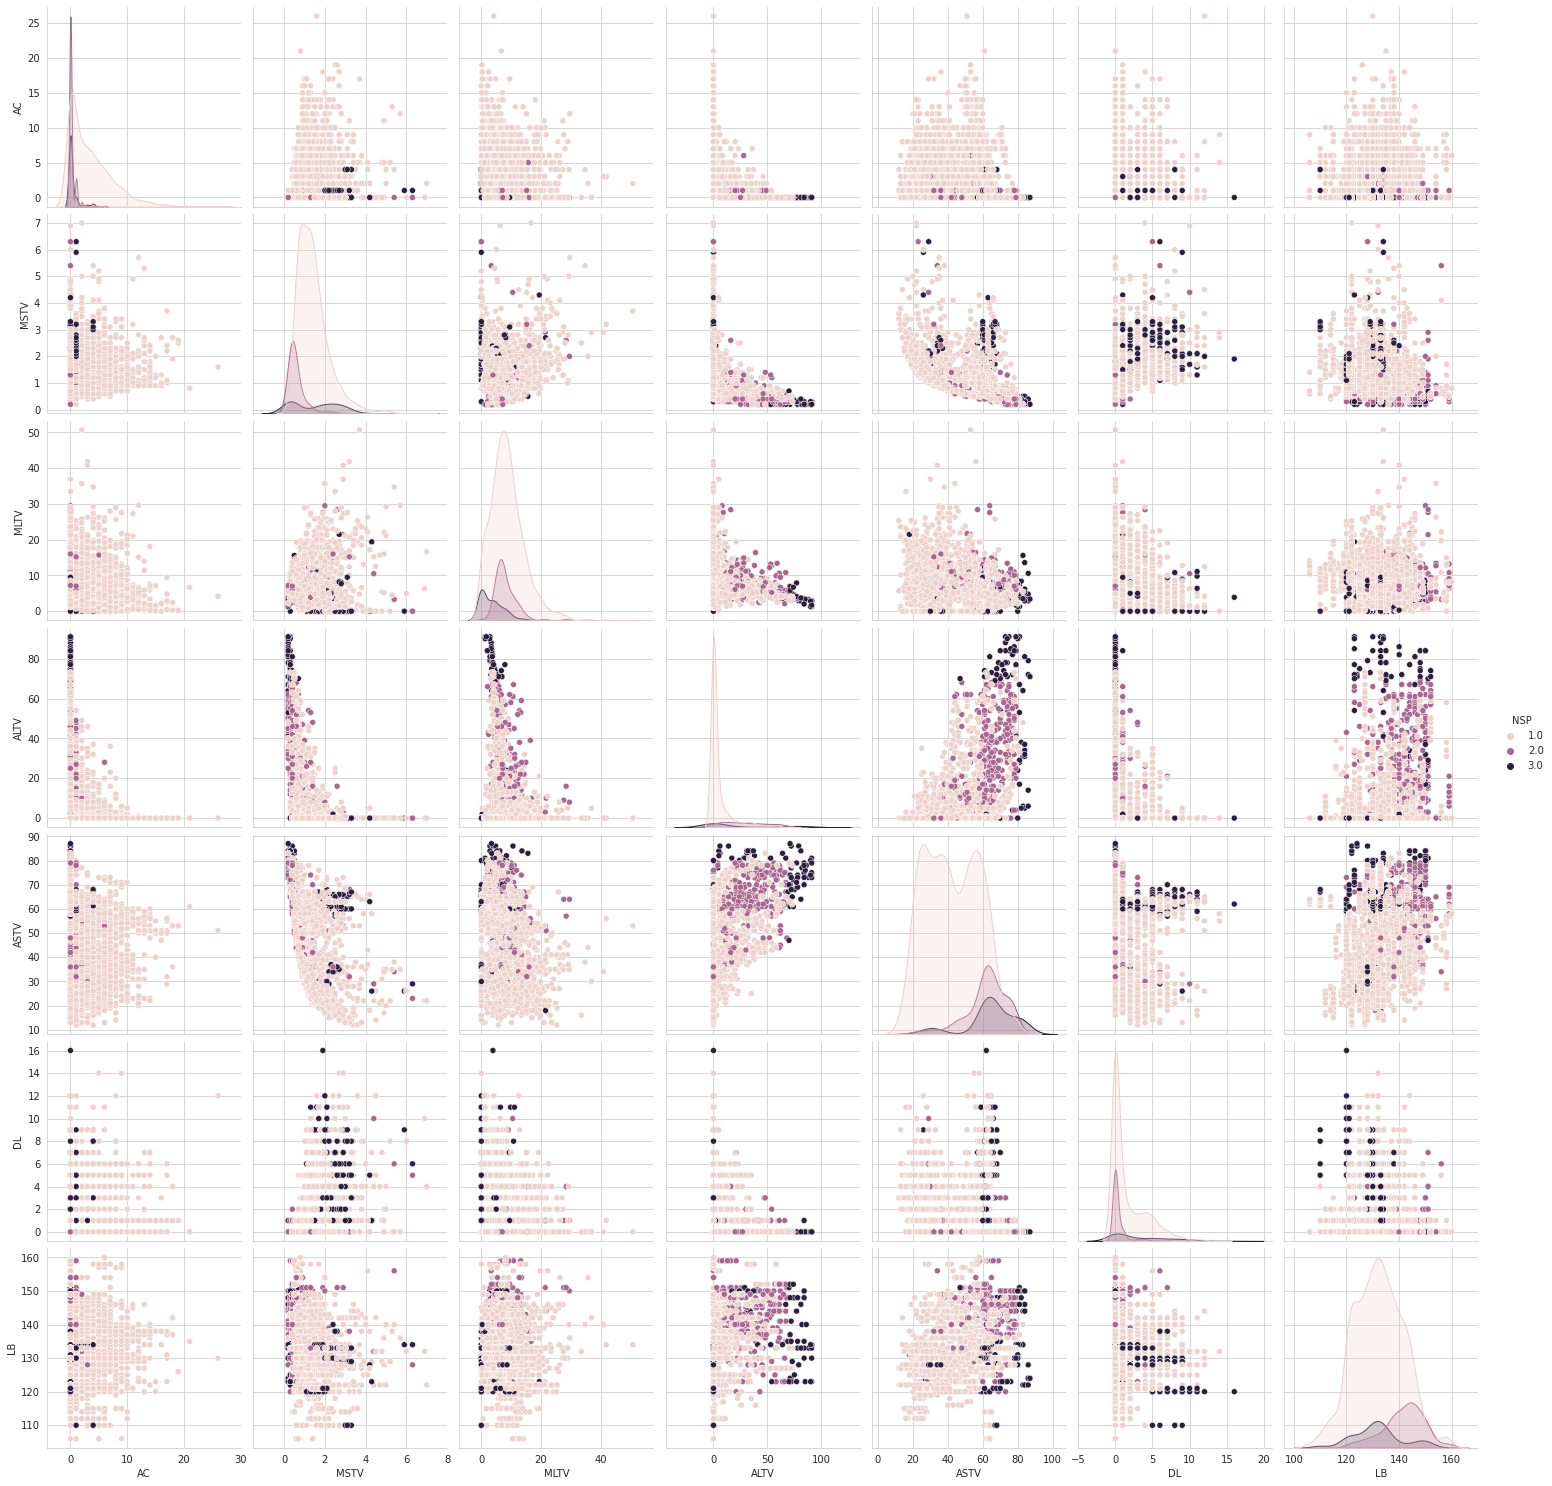

In [5]:
sns.set_style("whitegrid");
sns.pairplot(ctg[['AC', 'MSTV', 'MLTV', 'ALTV', 'ASTV', 'DL', 'LB', 'NSP']], hue='NSP', size=3);

2. Here we try to display the correlation matrix between the features, which we used as the reference to build the fuzzy logic model

In [6]:
ctg.corr()

,LB,AC,FM,UC,ASTV,MSTV,ALTV,MLTV,DL,DS,DP,Width,Min,Max,Nmax,Nzeros,Mode,Mean,Median,Variance,Tendency,CLASS,NSP
LB,1.000000,-0.077967,-0.033305,-0.127722,0.305570,-0.279607,0.285630,-0.032091,-0.155908,-0.053518,-0.117133,-0.147679,0.361619,0.275110,-0.113933,-0.004745,0.708993,0.723121,0.789246,-0.133938,0.293503,0.143001,0.148151
AC,-0.077967,1.000000,0.053956,0.212100,-0.197985,0.191378,-0.345162,-0.128901,-0.011350,-0.039341,-0.110317,0.291516,-0.157447,0.373493,0.191475,-0.011430,0.221693,0.236811,0.250729,0.111981,0.032235,-0.255205,-0.340394
FM,-0.033305,0.053956,1.000000,0.010623,-0.095019,0.172669,-0.038904,0.069739,0.110411,0.099984,0.247217,0.171448,-0.158422,0.111228,0.183904,-0.014632,-0.037492,-0.085718,-0.056281,0.177793,-0.000069,0.077805,0.060366
UC,-0.127722,0.212100,0.010623,1.000000,-0.071354,0.248094,-0.229877,-0.080503,0.351366,0.068483,0.174308,0.152990,-0.112597,0.146645,0.095512,0.022701,-0.077695,-0.169739,-0.111041,0.184188,-0.060995,-0.073465,-0.163295
ASTV,0.305570,-0.197985,-0.095019,-0.071354,1.000000,-0.419104,0.461544,-0.302416,-0.030443,0.049515,0.061727,-0.260463,0.275378,-0.111806,-0.167561,-0.149296,0.058363,0.074554,0.119960,-0.146434,-0.005748,0.284580,0.471191
MSTV,-0.279607,0.191378,0.172669,0.248094,-0.419104,1.000000,-0.450527,0.094506,0.525126,0.080278,0.304793,0.660847,-0.622569,0.409072,0.501430,0.266183,-0.307586,-0.445401,-0.336109,0.555852,-0.066140,0.077214,-0.103382
ALTV,0.285630,-0.345162,-0.038904,-0.229877,0.461544,-0.450527,1.000000,-0.152700,-0.251200,0.004957,-0.120312,-0.451297,0.422834,-0.283183,-0.279301,-0.121784,0.165211,0.222321,0.186480,-0.281536,0.042481,0.303050,0.426146
MLTV,-0.032091,-0.128901,0.069739,-0.080503,-0.302416,0.094506,-0.152700,1.000000,-0.226125,0.022283,-0.195390,0.110942,-0.144976,0.002023,0.056357,0.123869,0.072071,0.137813,0.063228,-0.164079,0.153093,-0.228310,-0.226797
DL,-0.155908,-0.011350,0.110411,0.351366,-0.030443,0.525126,-0.251200,-0.226125,1.000000,0.156767,0.309295,0.520656,-0.539125,0.242187,0.393860,0.208487,-0.315463,-0.509446,-0.353878,0.515130,-0.000687,0.395887,0.065328
DS,-0.053518,-0.039341,0.099984,0.068483,0.049515,0.080278,0.004957,0.022283,0.156767,1.000000,0.081048,0.044880,-0.071974,-0.021135,0.007024,0.043441,-0.215161,-0.158673,-0.160451,0.136421,-0.070483,0.060861,0.131934


2. Here we try to visualize the density of the CLASS based on the NSP

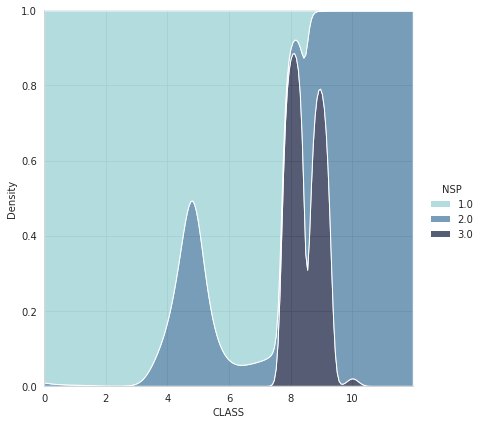

In [77]:
sns.displot(
    data=ctg,
    x="CLASS", hue="NSP",
    kind="kde", height=6,
    multiple="fill", clip=(0, None),
    palette="ch:rot=-.25,hue=1,light=.75",
)

### Data Cleaning

3. Checking the number of unique value present in each features

In [7]:
print(ctg.nunique())

LB           48
AC           22
FM           96
UC           19
ASTV         75
MSTV         57
ALTV         87
MLTV        249
DL           15
DS            2
DP            5
Width       154
Min         109
Max          86
Nmax         18
Nzeros        9
Mode         88
Mean        103
Median       95
Variance    133
Tendency      3
CLASS        10
NSP           3
dtype: int64


4. Dimension of the raw data 

In [8]:
ctg.shape

(2129, 23)

5. We will be checking on the distribution of the classes in the data. We are doing so to determine the correct evaluation metrics to use so that the further evaluation in the process of building machine learning model will be efficient

In [9]:
grouped_NSP = ctg['NSP'].value_counts()

6. The graph below shows that most data are skewed in class one hence we cannot use the usual classification metrics for the evaluations. Hence we use the weighted average for all the metrics as it will be a good option for imbalance multi class classification 

<AxesSubplot:title={'center':'Distribution of Classes'}, xlabel='NSP', ylabel='Pregnant Mothers'>

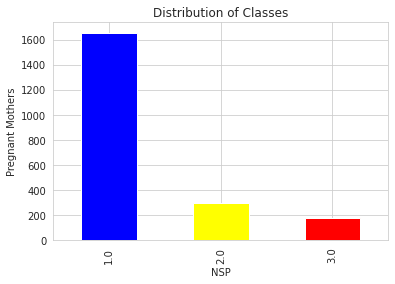

In [10]:
grouped_NSP.plot(kind="bar", color=['blue', 'yellow', 'red'], title="Distribution of Classes" , xlabel='NSP', ylabel='Pregnant Mothers')

7. Previously we checked the number of unique values and we have found that columns that have least unique values contribute less in the prediction hence we are going to remove them. However there are exceptions for categorical features as they usually come with few unique values

In [11]:
ctg_columns = ctg.columns
total_percentage = []
for i in range(len(ctg_columns)):
    num = ctg[ctg_columns[i]].nunique()
    #print(num)
    percentage= float(num) / ctg.shape[0] * 100
    total_percentage.append(percentage)

8. The computation below shows the uniqueness of features based on the number columns available in the dataset

,Columns,Variance Percentage
0,LB,2.254580
1,AC,1.033349
2,FM,4.509159
3,UC,0.892438
4,ASTV,3.522781
5,MSTV,2.677313
6,ALTV,4.086426
7,MLTV,11.695632
8,DL,0.704556
9,DS,0.093941


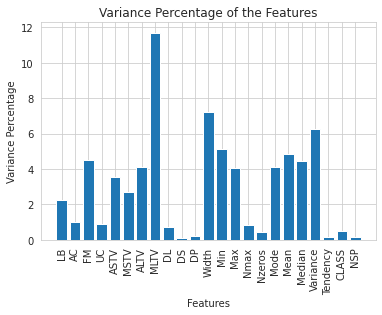

In [12]:
import matplotlib.pyplot as plt 
    
plt.bar(ctg_columns, total_percentage)
plt.title("Variance Percentage of the Features")
plt.xlabel("Features")
plt.ylabel("Variance Percentage")
plt.xticks(rotation=90)

percentages = {'Columns': ctg_columns, 'Variance Percentage': total_percentage}
percentage_pd = pd.DataFrame(percentages)
percentage_pd

9. Here we are removing columns that have less than 0.5% percentage, as they have very few unique values.

In [13]:
cleaned_ctg = ctg.drop(columns=['DS', 'DP', 'Nzeros', 'CLASS'])

10. Next we will be indetifying all the duplicated rows that are scattered around the dataset. The reason why we are doing this is because there are possibilites where duplicates may present in the dataset. These duplicate rows will then be present in both training and testing dataset which will then cause anomalies in prediction.

In [14]:
print(cleaned_ctg.duplicated().any())

True


11. Here we print the number of duplicated rows present in the dataset and there are 12 of them.

In [15]:
print(cleaned_ctg[cleaned_ctg.duplicated()])

         LB   AC    FM   UC  ASTV  ...   Mean  Median  Variance  Tendency  NSP
68    140.0  5.0   0.0  3.0  34.0  ...  153.0   155.0       5.0       0.0  1.0
234   123.0  0.0   0.0  0.0  49.0  ...  127.0   129.0       2.0       1.0  1.0
306   145.0  0.0  13.0  0.0  77.0  ...  145.0   147.0       0.0       1.0  2.0
319   150.0  0.0  10.0  0.0  79.0  ...  149.0   151.0       0.0       0.0  3.0
324   135.0  0.0   0.0  0.0  62.0  ...  142.0   144.0       1.0       1.0  3.0
333   144.0  0.0  15.0  0.0  76.0  ...  144.0   146.0       2.0       1.0  2.0
787   123.0  3.0   4.0  0.0  52.0  ...  128.0   130.0       4.0       1.0  1.0
791   123.0  2.0   3.0  0.0  50.0  ...  128.0   130.0       5.0       1.0  1.0
798   146.0  0.0   0.0  4.0  65.0  ...  149.0   151.0       1.0       1.0  2.0
849   138.0  2.0   0.0  4.0  41.0  ...  142.0   143.0       2.0       1.0  1.0
1113  122.0  0.0   0.0  0.0  19.0  ...  120.0   122.0       3.0       0.0  1.0
1114  122.0  0.0   0.0  0.0  19.0  ...  120.0   122.

In [16]:
cleaned_ctg.drop_duplicates(inplace=True)

12. We are also trying to replace all the NaN values with some reasonable values using knn imputer because every data in a row has its meaning and removing it without proper justification is not feasible

In [17]:
from sklearn.impute import KNNImputer

imputer = KNNImputer()
imputer.fit(cleaned_ctg)
new_cleaned_ctg = imputer.transform(cleaned_ctg)
cleaned_ctg = pd.DataFrame(new_cleaned_ctg, columns=cleaned_ctg.columns)

In [18]:
cleaned_ctg

,LB,AC,FM,UC,ASTV,MSTV,ALTV,MLTV,DL,Width,Min,Max,Nmax,Mode,Mean,Median,Variance,Tendency,NSP
0,120.000000,0.000000,0.000000,0.000000,73.000000,0.500000,43.000000,2.400000,0.000000,64.000000,62.000000,126.000000,2.000000,120.00000,137.000000,121.000000,73.000000,1.000000,2.00000
1,132.000000,4.000000,0.000000,4.000000,17.000000,2.100000,0.000000,10.400000,2.000000,130.000000,68.000000,198.000000,6.000000,141.00000,136.000000,140.000000,12.000000,0.000000,1.00000
2,133.000000,2.000000,0.000000,5.000000,16.000000,2.100000,0.000000,13.400000,2.000000,130.000000,68.000000,198.000000,5.000000,141.00000,135.000000,138.000000,13.000000,0.000000,1.00000
3,134.000000,2.000000,0.000000,6.000000,16.000000,2.400000,0.000000,23.000000,2.000000,117.000000,53.000000,170.000000,11.000000,137.00000,134.000000,137.000000,13.000000,1.000000,1.00000
4,132.000000,4.000000,0.000000,5.000000,16.000000,2.400000,0.000000,19.900000,0.000000,117.000000,53.000000,170.000000,9.000000,137.00000,136.000000,138.000000,11.000000,1.000000,1.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2110,140.000000,1.000000,0.000000,9.000000,78.000000,0.400000,27.000000,7.000000,0.000000,66.000000,103.000000,169.000000,6.000000,152.00000,147.000000,151.000000,4.000000,1.000000,2.00000
2111,142.000000,1.000000,1.000000,5.000000,74.000000,0.400000,36.000000,5.000000,0.000000,42.000000,117.000000,159.000000,2.000000,145.00000,143.000000,145.000000,1.000000,0.000000,1.00000
2112,133.296875,2.733902,7.531472,3.687648,46.997634,1.338239,9.798391,8.189304,1.586566,70.566288,93.539299,164.105587,4.078598,137.44839,134.592803,138.083333,18.916193,0.318655,1.30303
2113,126.600000,2.800000,0.000000,3.800000,31.400000,1.080000,0.000000,7.240000,0.000000,57.400000,107.000000,164.400000,1.600000,129.80000,134.200000,133.400000,13.200000,-0.600000,1.00000


13. We have discovered that there are 2 rows which have new imputed values for the NSP class, but they are in floating point values. Hence, we are trying to round of their value into a whole number

In [19]:
cleaned_ctg.iloc[2112]['NSP'] = 1

In [20]:
cleaned_ctg.iloc[2114]['NSP'] = 2

14. Here we also trying to find the outliers in the data as we are not 100% sure that all the data present in the dataset are normal. Moreover, there are also possibilities where the newly imputed values may introduce new outliers to the dataset

In [21]:
from sklearn.neighbors import LocalOutlierFactor
lof = LocalOutlierFactor()
yhat = lof.fit_predict(cleaned_ctg)
mask = (yhat != -1)

In [22]:
mask_pd = pd.DataFrame(yhat==-1)

In [23]:
cleaned_ctg = cleaned_ctg.iloc[mask]

In [24]:
cleaned_ctg.shape

(2059, 19)

### Data Splitting 

15. First we are going to separate the columns into X and y

- We are assigning the NSP column to y as its the target variable

- We are assigning the rest of the columns to X as they are going to be the features we will be using to predict

- But before we assigning the features we are droping the NSP column as they are not contributing much in this context

- After we seggregate the feature columns, now we are going to normalize them to keep all the values within the range to make it easy for the models to perform predictions

In [25]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
y = cleaned_ctg['NSP']
X = cleaned_ctg.drop(columns=['NSP'])
scaler = StandardScaler()
X_norm = scaler.fit_transform(X)
X_norm = pd.DataFrame(X_norm)
X_norm.columns = X.columns

16. We are splitting the data here into train set and test set.
We are allocating 80% of the data for train set, and 20% for testing set.

In [26]:
from sklearn.model_selection import train_test_split
seed_num = 10
X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size=0.20, random_state=seed_num)

## Feature Selection

17. We are performing feature selection for 2 to 17 number of features using Sequential Forwardward Selection
We are performing sequential feature selector on different number of features to find out the best number of features that can be used in the different machine learning model

In [27]:
best_features_backward = []
feature_params = []

18. Dimension of train data 

In [28]:
X_train.shape

(1647, 18)

If you encounter any problem in running any cells that uses matplotlib or sklearn package, kindly run this cell and restart the kernel and rerun the codes again.

In [29]:
# !pip install -U scikit-learn
# !pip install -U matplotlib

19. We created a function which will be used to perform feature selection for each model. We are using sequential forward selection.
For each iteration, we will append the best feature subset that we have found to the best_features list and after all the iterations complete we will return back the list to the line that calls it.

In [30]:
from sklearn.feature_selection import SequentialFeatureSelector
def featureSelectionForward(model):
  best_features = []
  for x in range(2,18):
    tempModel = model
    FSM = SequentialFeatureSelector(tempModel, n_features_to_select = x, direction='forward', scoring='f1_weighted', cv=6)
    FSM.fit(X_train, y_train)
    best_feature = list(X.columns[FSM.get_support()])
    best_features.append(best_feature)
  
  return best_features

20. This is the cell where we call the feature selection function to perform feature selection for different machine learning models. Moreover we are using some loose parameters for the machine learning model to avoid it returning back features that leads to overfitting problem.

In [31]:
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
#Feature Selection For Perceptron
feature_pcpt = featureSelectionForward(SGDClassifier(loss='perceptron', eta0=0.1, learning_rate='constant', penalty=None, max_iter=100, random_state=100))
features_lgr = featureSelectionForward(LogisticRegression(multi_class='multinomial', solver='lbfgs', C=0.1,max_iter=100))
features_dt = featureSelectionForward(DecisionTreeClassifier(random_state=50))
features_SVC = featureSelectionForward(SVC(kernel='linear'))
features_KNN = featureSelectionForward(KNeighborsClassifier())

21. Now we create a new dictionary for each of the model to store the list of best feature subset for forward selection.
We will use this dictionary to create a Pandas DataFrame, to visualize the features clearer

In [32]:
features_pcpt_all =pd.DataFrame({"features": [2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17], "best_backward": feature_pcpt})
features_lgr_all = pd.DataFrame({"features": [2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17], "best_backward": features_lgr})
features_dt_all = pd.DataFrame({"features": [2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17], "best_backward": features_dt})
features_SVC_all = pd.DataFrame({"features": [2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17],"best_backward": features_SVC})
features_KNN_all = pd.DataFrame({"features": [2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17], "best_backward": features_KNN})

In [33]:
features_pcpt_all

,features,best_backward
0,2,"[MSTV, Variance]"
1,3,"[ASTV, MSTV, Variance]"
2,4,"[ASTV, MSTV, ALTV, Variance]"
3,5,"[ASTV, MSTV, ALTV, Median, Variance]"
4,6,"[FM, ASTV, MSTV, ALTV, Median, Variance]"
5,7,"[FM, UC, ASTV, MSTV, ALTV, Median, Variance]"
6,8,"[LB, FM, UC, ASTV, MSTV, ALTV, Median, Variance]"
7,9,"[LB, FM, UC, ASTV, MSTV, ALTV, Nmax, Median, V..."
8,10,"[LB, FM, UC, ASTV, MSTV, ALTV, Nmax, Median, V..."
9,11,"[LB, AC, FM, UC, ASTV, MSTV, ALTV, Nmax, Media..."


In [34]:
features_lgr_all

,features,best_backward
0,2,"[ALTV, Mean]"
1,3,"[ASTV, ALTV, Mean]"
2,4,"[AC, ASTV, ALTV, Mean]"
3,5,"[AC, ASTV, ALTV, Mean, Variance]"
4,6,"[AC, UC, ASTV, ALTV, Mean, Variance]"
5,7,"[AC, UC, ASTV, ALTV, Max, Mean, Variance]"
6,8,"[AC, UC, ASTV, ALTV, Max, Mode, Mean, Variance]"
7,9,"[AC, UC, ASTV, ALTV, Max, Nmax, Mode, Mean, Va..."
8,10,"[AC, UC, ASTV, ALTV, Max, Nmax, Mode, Mean, Va..."
9,11,"[AC, FM, UC, ASTV, ALTV, Max, Nmax, Mode, Mean..."


In [35]:
features_dt_all

,features,best_backward
0,2,"[MSTV, Mode]"
1,3,"[ASTV, MSTV, Mode]"
2,4,"[ASTV, MSTV, ALTV, Mode]"
3,5,"[ASTV, MSTV, ALTV, Mode, Mean]"
4,6,"[FM, ASTV, MSTV, ALTV, Mode, Mean]"
5,7,"[AC, FM, ASTV, MSTV, ALTV, Mode, Mean]"
6,8,"[AC, FM, ASTV, MSTV, ALTV, Mode, Mean, Variance]"
7,9,"[AC, FM, ASTV, MSTV, ALTV, Nmax, Mode, Mean, V..."
8,10,"[AC, FM, ASTV, MSTV, ALTV, Nmax, Mode, Mean, V..."
9,11,"[AC, FM, ASTV, MSTV, ALTV, DL, Nmax, Mode, Mea..."


In [36]:
features_SVC_all

,features,best_backward
0,2,"[ALTV, Mean]"
1,3,"[AC, ALTV, Mean]"
2,4,"[AC, ASTV, ALTV, Mean]"
3,5,"[AC, ASTV, ALTV, Mean, Variance]"
4,6,"[AC, UC, ASTV, ALTV, Mean, Variance]"
5,7,"[LB, AC, UC, ASTV, ALTV, Mean, Variance]"
6,8,"[LB, AC, FM, UC, ASTV, ALTV, Mean, Variance]"
7,9,"[LB, AC, FM, UC, ASTV, ALTV, Mean, Median, Var..."
8,10,"[LB, AC, FM, UC, ASTV, ALTV, Nmax, Mean, Media..."
9,11,"[LB, AC, FM, UC, ASTV, ALTV, Nmax, Mean, Media..."


In [37]:
features_KNN_all

,features,best_backward
0,2,"[ALTV, Mean]"
1,3,"[ASTV, ALTV, Mean]"
2,4,"[LB, ASTV, ALTV, Mean]"
3,5,"[LB, AC, ASTV, ALTV, Mean]"
4,6,"[LB, AC, ASTV, ALTV, Mean, Median]"
5,7,"[LB, AC, ASTV, MSTV, ALTV, Mean, Median]"
6,8,"[LB, AC, ASTV, MSTV, ALTV, Mean, Median, Varia..."
7,9,"[LB, AC, FM, ASTV, MSTV, ALTV, Mean, Median, V..."
8,10,"[LB, AC, FM, ASTV, MSTV, ALTV, DL, Mean, Media..."
9,11,"[LB, AC, FM, UC, ASTV, MSTV, ALTV, DL, Mean, M..."


## Training the Models

22. Here we are going to train the model with some loose parameter and best feature subsets to see how it performs before heading over to the hyperparameter tuning. We created a function to perform training to different model. To test the model we are not using the testing set instead we are using cross validation with training set to see the model performance. This is because we try to avoid any data leaking in the process of building the model. As what we have mentioned previously we using the weighted average for the metrics F1, Precision and Recall

In [40]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score, precision_score, recall_score
from sklearn.model_selection import cross_val_score
def trainModel(model, features):
  pres_score = []
  rec_score = []
  acc_score = []
  F1_score = []
  report = []
  classif_report = []
  for x in range(16):
    # tempModel = model
    scoresAcc = cross_val_score(model, X_train[features[x]], y_train, scoring='accuracy')
    scoresRec = cross_val_score(model, X_train[features[x]], y_train, scoring='recall_weighted')
    scoresF1 = cross_val_score(model, X_train[features[x]], y_train, scoring='f1_weighted')
    scoresPres = cross_val_score(model, X_train[features[x]], y_train, scoring='precision_weighted')
    pres_score.append(scoresAcc.mean())
    rec_score.append(scoresRec.mean())
    F1_score.append(scoresF1.mean())
    acc_score.append(scoresPres.mean())
    report.append(classif_report)


  return acc_score, pres_score, rec_score, F1_score, report

23. Perceptron Testing Model 

In [41]:
acc, pres, rec, f1, report_classif = trainModel(SGDClassifier(loss='perceptron', eta0=0.5, learning_rate='constant', penalty=None, max_iter=100, random_state=100), feature_pcpt)

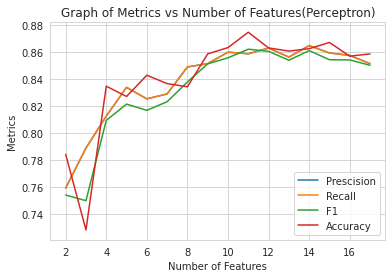

In [42]:
plt.title("Graph of Metrics vs Number of Features(Perceptron)")
plt.ylabel("Metrics")
plt.xlabel("Number of Features")
plt.plot(np.arange(2,18,1), pres, label="Prescision") 
plt.plot(np.arange(2,18,1), rec, label='Recall') 
plt.plot(np.arange(2,18,1), f1, label='F1')
plt.plot(np.arange(2,18,1), acc, label='Accuracy')  
plt.legend()

24. Logisitic Regression Testing Model

In [43]:
acc, pres, rec, f1,  report_classif = trainModel(LogisticRegression(multi_class='multinomial', solver='sag', C=0.1,max_iter=100), features_lgr)

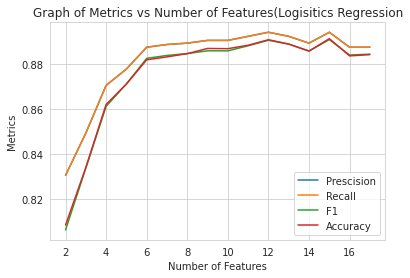

In [44]:
plt.title("Graph of Metrics vs Number of Features(Logisitics Regression")
plt.ylabel("Metrics")
plt.xlabel("Number of Features")
plt.plot(np.arange(2,18,1), pres, label="Prescision") 
plt.plot(np.arange(2,18,1), rec, label='Recall') 
plt.plot(np.arange(2,18,1), f1, label='F1')
plt.plot(np.arange(2,18,1), acc, label='Accuracy')  
plt.legend()

25. Decision Tree Testing Model

In [45]:
acc, pres, rec, f1,  report_classif = trainModel(DecisionTreeClassifier(max_depth=5,random_state=40), features_dt)

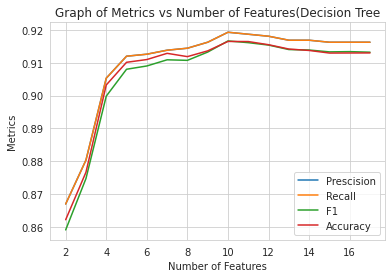

In [46]:
plt.title("Graph of Metrics vs Number of Features(Decision Tree")
plt.ylabel("Metrics")
plt.xlabel("Number of Features")
plt.plot(np.arange(2,18,1), pres, label="Prescision") 
plt.plot(np.arange(2,18,1), rec, label='Recall') 
plt.plot(np.arange(2,18,1), f1, label='F1')
plt.plot(np.arange(2,18,1), acc, label='Accuracy')  
plt.legend()

26. SVC Testing Model

In [47]:
acc, pres, rec, f1,  report_classif = trainModel(SVC(kernel='linear', C=2), features_SVC)

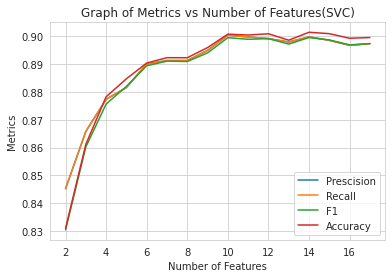

In [48]:
plt.title("Graph of Metrics vs Number of Features(SVC)")
plt.ylabel("Metrics")
plt.xlabel("Number of Features")
plt.plot(np.arange(2,18,1), pres, label="Prescision") 
plt.plot(np.arange(2,18,1), rec, label='Recall') 
plt.plot(np.arange(2,18,1), f1, label='F1')
plt.plot(np.arange(2,18,1), acc, label='Accuracy')  
plt.legend()

27. KNN Testing Model

In [49]:
acc, pres, rec, f1,  report_classif = trainModel(KNeighborsClassifier(), features_KNN)

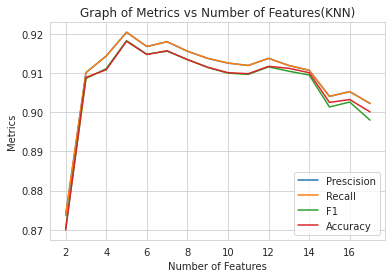

In [50]:
plt.title("Graph of Metrics vs Number of Features(KNN)")
plt.ylabel("Metrics")
plt.xlabel("Number of Features")
plt.plot(np.arange(2,18,1), pres, label="Prescision") 
plt.plot(np.arange(2,18,1), rec, label='Recall') 
plt.plot(np.arange(2,18,1), f1, label='F1')
plt.plot(np.arange(2,18,1), acc, label='Accuracy')  
plt.legend()

## Hyperparameter tuning

28. Next we are going to find the best parameters that each model can have along with the best features. We are going to run the grid search for a couple of different set of parameters, to see which hyperparameter works the best for its repective best feature subset
We will then collect all the results we get from the grid search and append it to a list called featureParameters

29. Below is the function that have been created to perform GridSearchCV. This function will perform parameter tuning for every feature subset for each machine learning models and append the results to the featureParameter. Once the tuning is done it will return back the results to the line that calls it.

In [51]:
from sklearn.model_selection import GridSearchCV
from google.colab import files
def parameterTuning(model, parameters, features):
  featuresParameters = []
  for x in range(16):
    tempModel = model
    gsc = GridSearchCV(tempModel, parameters, cv=6, n_jobs=4, scoring=['accuracy','precision_weighted', 'recall_weighted', 'f1_weighted'], refit='f1_weighted', verbose=3, return_train_score=True)
    gsc.fit(X_train[features[x]], y_train)
    gsc_csv_pd = pd.DataFrame(gsc.cv_results_)
    gsc_csv_pd.to_csv('filename.csv') 
    result = {'model_score': gsc.best_score_, 'model_hyperparameters': gsc.best_params_, 'best_features': features[x], 'train_scores':{'accuracy': gsc_csv_pd.iloc[gsc.best_index_]['mean_train_accuracy'], 'precision': gsc_csv_pd.iloc[gsc.best_index_]['mean_train_precision_weighted'], 'recall': gsc_csv_pd.iloc[gsc.best_index_]['mean_train_recall_weighted'], 'f1': gsc_csv_pd.iloc[gsc.best_index_]['mean_train_f1_weighted'] }}
    featuresParameters.append(result)

  return featuresParameters


30. The cell below contains the parameter dictionary for each machine learning models. They will then be passed to the function calls as arguments to perform feature selection.

In [53]:
parameters_pcpt = {'eta0': [0.01, 0.05, 0.1, 0.5, 1.0], 'max_iter': [100,200,300,400]}
parameters_lgr = {'solver': ['lbfgs', 'sag', 'saga'], 'max_iter': [100,200,300], 'C': [0.001,0.01,0.1,1]}
parameters_dt = {'criterion':['entropy','gini'],'max_depth':[5,6,7,8],  'min_samples_split': np.arange(1,6,1), "min_samples_leaf":range(1,6,1), "random_state": range(10,45,10)} #pre prunning
parameters_SVC = {'kernel': ('poly','rbf', 'linear'), 'C': [0.1, 1, 5], 'degree': [2,3,4]}
parameters_KNN = {'n_neighbors': [5, 10, 15, 20], 'metric': ['minkowski', 'euclidean', 'manhattan']}
feature_params_pcpt = parameterTuning(SGDClassifier(loss='perceptron', eta0=1, learning_rate='constant', penalty=None,random_state=100), parameters_pcpt, feature_pcpt)
feature_params_lgr = parameterTuning(LogisticRegression(multi_class='multinomial'), parameters_lgr, features_lgr)
feature_params_dt = parameterTuning(DecisionTreeClassifier(), parameters_dt, features_dt)
feature_params_SVC = parameterTuning(SVC(), parameters_SVC, features_SVC)
feature_params_KNN = parameterTuning(KNeighborsClassifier(), parameters_KNN, features_KNN)

Fitting 6 folds for each of 20 candidates, totalling 120 fits
Fitting 6 folds for each of 20 candidates, totalling 120 fits
Fitting 6 folds for each of 20 candidates, totalling 120 fits
Fitting 6 folds for each of 20 candidates, totalling 120 fits
Fitting 6 folds for each of 20 candidates, totalling 120 fits
Fitting 6 folds for each of 20 candidates, totalling 120 fits
Fitting 6 folds for each of 20 candidates, totalling 120 fits
Fitting 6 folds for each of 20 candidates, totalling 120 fits
Fitting 6 folds for each of 20 candidates, totalling 120 fits
Fitting 6 folds for each of 20 candidates, totalling 120 fits
Fitting 6 folds for each of 20 candidates, totalling 120 fits
Fitting 6 folds for each of 20 candidates, totalling 120 fits
Fitting 6 folds for each of 20 candidates, totalling 120 fits
Fitting 6 folds for each of 20 candidates, totalling 120 fits
Fitting 6 folds for each of 20 candidates, totalling 120 fits
Fitting 6 folds for each of 20 candidates, totalling 120 fits
Fitting 

31. After GridSearchCV has been performed, now we are going to determine which is the best parameter and best feature subsets by comparing each models best score from the GridSearchCV. The function below will find the index of the best feature and parameter in the list of the respective models.

In [54]:
def findMax(featureParams):
  max_score_index = 0
  max_score = 0
  i = 0
  for x in featureParams:
      if x['model_score'] > max_score:
          max_score = x['model_score']
          max_score_index = i
      i = i + 1

  return max_score_index

32. The variables below store the index of the best features and parameters.

In [55]:
max_score_pcpt = findMax(feature_params_pcpt)
max_score_lgr = findMax(feature_params_lgr)
max_score_dt = findMax(feature_params_dt)
max_score_SVC = findMax(feature_params_SVC)
max_score_KNN = findMax(feature_params_KNN)

## Testing the models

33. We are gathering all the best models into the best_models list. We are now testing the models with best parameters choosen previously using the test set.

In [89]:
best_models = []

In [90]:
model_pcpt_best = SGDClassifier(loss='perceptron', eta0=feature_params_pcpt[max_score_pcpt]['model_hyperparameters']['eta0'], learning_rate='constant', penalty=None, max_iter=feature_params_pcpt[max_score_pcpt]['model_hyperparameters']['max_iter'], random_state=100)
model_pcpt_best.fit(X_train[feature_params_pcpt[max_score_pcpt]['best_features']], y_train)
y_pred = model_pcpt_best.predict(X_test[feature_params_pcpt[max_score_pcpt]['best_features']])
new_scores = {
    'acc': accuracy_score(y_test, y_pred),
    'pres': precision_score(y_test, y_pred, average='weighted'),
    'recall': recall_score(y_test, y_pred, average='weighted'),
    'f1': f1_score(y_test, y_pred, average='weighted'),
}
best_models.append({'model_name': 'pcpt', 'model': model_pcpt_best, 'features': feature_params_pcpt[max_score_pcpt], 'new_scores': new_scores})
print("Accuracy score:",accuracy_score(y_test, y_pred))
print("Precision score:",precision_score(y_test, y_pred, average='weighted'))
print("Recall score:",recall_score(y_test, y_pred, average='weighted'))
print("F1 score:",f1_score(y_test, y_pred, average='weighted'))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy score: 0.8276699029126213
Precision score: 0.8165652082813375
Recall score: 0.8276699029126213
F1 score: 0.8166657738419901
[[285  19   6]
 [ 25  17  17]
 [  3   1  39]]
              precision    recall  f1-score   support

         1.0       0.91      0.92      0.91       310
         2.0       0.46      0.29      0.35        59
         3.0       0.63      0.91      0.74        43

    accuracy                           0.83       412
   macro avg       0.67      0.70      0.67       412
weighted avg       0.82      0.83      0.82       412



In [91]:
model_lgr_best = LogisticRegression(multi_class='multinomial', solver=feature_params_lgr[max_score_lgr]['model_hyperparameters']['solver'], max_iter=feature_params_lgr[max_score_lgr]['model_hyperparameters']['max_iter'], C=feature_params_lgr[max_score_lgr]['model_hyperparameters']['C'],random_state=100)
model_lgr_best.fit(X_train[feature_params_lgr[max_score_lgr]['best_features']], y_train)
y_pred = model_lgr_best.predict(X_test[feature_params_lgr[max_score_lgr]['best_features']])
new_scores = {
    'acc': accuracy_score(y_test, y_pred),
    'pres': precision_score(y_test, y_pred, average='weighted'),
    'recall': recall_score(y_test, y_pred, average='weighted'),
    'f1': f1_score(y_test, y_pred, average='weighted'),
}
best_models.append({'model_name': 'lgr', 'model': model_lgr_best, 'features': feature_params_lgr[max_score_lgr], 'new_scores': new_scores})
print("Accuracy score:",accuracy_score(y_test, y_pred))
print("Precision score:",precision_score(y_test, y_pred, average='weighted'))
print("Recall score:",recall_score(y_test, y_pred, average='weighted'))
print("F1 score:",f1_score(y_test, y_pred, average='weighted'))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy score: 0.8859223300970874
Precision score: 0.8797381118692692
Recall score: 0.8859223300970874
F1 score: 0.8797232899948597
[[301   4   5]
 [ 20  32   7]
 [  5   6  32]]
              precision    recall  f1-score   support

         1.0       0.92      0.97      0.95       310
         2.0       0.76      0.54      0.63        59
         3.0       0.73      0.74      0.74        43

    accuracy                           0.89       412
   macro avg       0.80      0.75      0.77       412
weighted avg       0.88      0.89      0.88       412



In [92]:
model_dt_best = DecisionTreeClassifier(random_state=feature_params_dt[max_score_dt]['model_hyperparameters']['random_state'],criterion=feature_params_dt[max_score_dt]['model_hyperparameters']['criterion'], max_depth=feature_params_dt[max_score_dt]['model_hyperparameters']['max_depth'], min_samples_split=feature_params_dt[max_score_dt]['model_hyperparameters']['min_samples_split'],min_samples_leaf=feature_params_dt[max_score_dt]['model_hyperparameters']['min_samples_leaf'])
model_dt_best.fit(X_train[feature_params_dt[max_score_dt]['best_features']], y_train)
y_pred = model_dt_best.predict(X_test[feature_params_dt[max_score_dt]['best_features']])
new_scores = {
    'acc': accuracy_score(y_test, y_pred),
    'pres': precision_score(y_test, y_pred, average='weighted'),
    'recall': recall_score(y_test, y_pred, average='weighted'),
    'f1': f1_score(y_test, y_pred, average='weighted'),
}
best_models.append({'model_name': 'dt', 'model': model_dt_best, 'features': feature_params_dt[max_score_dt], 'new_scores': new_scores})
print("Accuracy score:",accuracy_score(y_test, y_pred))
print("Precision score:",precision_score(y_test, y_pred, average='weighted'))
print("Recall score:",recall_score(y_test, y_pred, average='weighted'))
print("F1 score:",f1_score(y_test, y_pred, average='weighted'))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy score: 0.9247572815533981
Precision score: 0.9256243881181958
Recall score: 0.9247572815533981
F1 score: 0.9250327914537941
[[296  13   1]
 [ 11  47   1]
 [  4   1  38]]
              precision    recall  f1-score   support

         1.0       0.95      0.95      0.95       310
         2.0       0.77      0.80      0.78        59
         3.0       0.95      0.88      0.92        43

    accuracy                           0.92       412
   macro avg       0.89      0.88      0.88       412
weighted avg       0.93      0.92      0.93       412



In [93]:
model_svc_best = SVC(kernel=feature_params_SVC[max_score_SVC]['model_hyperparameters']['kernel'], C=feature_params_SVC[max_score_SVC]['model_hyperparameters']['C'], degree=feature_params_SVC[max_score_SVC]['model_hyperparameters']['degree'])
model_svc_best.fit(X_train[feature_params_SVC[max_score_SVC]['best_features']], y_train)
y_pred = model_svc_best.predict(X_test[feature_params_SVC[max_score_SVC]['best_features']])
new_scores = {
    'acc': accuracy_score(y_test, y_pred),
    'pres': precision_score(y_test, y_pred, average='weighted'),
    'recall': recall_score(y_test, y_pred, average='weighted'),
    'f1': f1_score(y_test, y_pred, average='weighted'),
}
best_models.append({'model_name': 'SVC', 'model': model_svc_best, 'features': feature_params_SVC[max_score_SVC], 'new_scores': new_scores})
print("Accuracy score:",accuracy_score(y_test, y_pred))
print("Precision score:",precision_score(y_test, y_pred, average='weighted'))
print("Recall score:",recall_score(y_test, y_pred, average='weighted'))
print("F1 score:",f1_score(y_test, y_pred, average='weighted'))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy score: 0.9223300970873787
Precision score: 0.9197617496745171
Recall score: 0.9223300970873787
F1 score: 0.9193584654399322
[[304   5   1]
 [ 16  41   2]
 [  5   3  35]]
              precision    recall  f1-score   support

         1.0       0.94      0.98      0.96       310
         2.0       0.84      0.69      0.76        59
         3.0       0.92      0.81      0.86        43

    accuracy                           0.92       412
   macro avg       0.90      0.83      0.86       412
weighted avg       0.92      0.92      0.92       412



In [94]:
knn_best = KNeighborsClassifier(n_neighbors=feature_params_KNN[max_score_KNN]['model_hyperparameters']['n_neighbors'], metric=feature_params_KNN[max_score_KNN]['model_hyperparameters']['metric'])
knn_best.fit(X_train[feature_params_KNN[max_score_KNN]['best_features']], y_train)
y_pred = knn_best.predict(X_test[feature_params_KNN[max_score_KNN]['best_features']])
new_scores = {
    'acc': accuracy_score(y_test, y_pred),
    'pres': precision_score(y_test, y_pred, average='weighted'),
    'recall': recall_score(y_test, y_pred, average='weighted'),
    'f1': f1_score(y_test, y_pred, average='weighted'),
}
best_models.append({'model_name': 'KNN', 'model': knn_best, 'features': feature_params_KNN[max_score_KNN], 'new_scores': new_scores})
print("Accuracy score:",accuracy_score(y_test, y_pred))
print("Precision score:",precision_score(y_test, y_pred, average='weighted'))
print("Recall score:",recall_score(y_test, y_pred, average='weighted'))
print("F1 score:",f1_score(y_test, y_pred, average='weighted'))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy score: 0.9223300970873787
Precision score: 0.9202556473717092
Recall score: 0.9223300970873787
F1 score: 0.9190230443730563
[[304   5   1]
 [ 18  40   1]
 [  5   2  36]]
              precision    recall  f1-score   support

         1.0       0.93      0.98      0.95       310
         2.0       0.85      0.68      0.75        59
         3.0       0.95      0.84      0.89        43

    accuracy                           0.92       412
   macro avg       0.91      0.83      0.87       412
weighted avg       0.92      0.92      0.92       412



In [109]:
best_models

[{'features': {'best_features': ['LB',
    'AC',
    'FM',
    'UC',
    'ASTV',
    'MSTV',
    'ALTV',
    'MLTV',
    'Width',
    'Nmax',
    'Median',
    'Variance',
    'Tendency'],
   'model_hyperparameters': {'eta0': 0.1, 'max_iter': 100},
   'model_score': 0.8679973688997764,
   'train_scores': {'accuracy': 0.8709133065358076,
    'f1': 0.8676869386588874,
    'precision': 0.8706576302619053,
    'recall': 0.8709133065358076}},
  'model': SGDClassifier(eta0=0.1, learning_rate='constant', loss='perceptron',
                max_iter=100, penalty=None, random_state=100),
  'model_name': 'pcpt',
  'new_scores': {'acc': 0.8276699029126213,
   'f1': 0.8166657738419901,
   'pres': 0.8165652082813375,
   'recall': 0.8276699029126213}},
 {'features': {'best_features': ['AC',
    'FM',
    'UC',
    'ASTV',
    'ALTV',
    'Max',
    'Nmax',
    'Mode',
    'Mean',
    'Variance',
    'Tendency'],
   'model_hyperparameters': {'C': 0.1, 'max_iter': 100, 'solver': 'lbfgs'},
   'model_sco

34. We are collecting all the training and testing scores of each models and displaying them side by side in a bar plot.

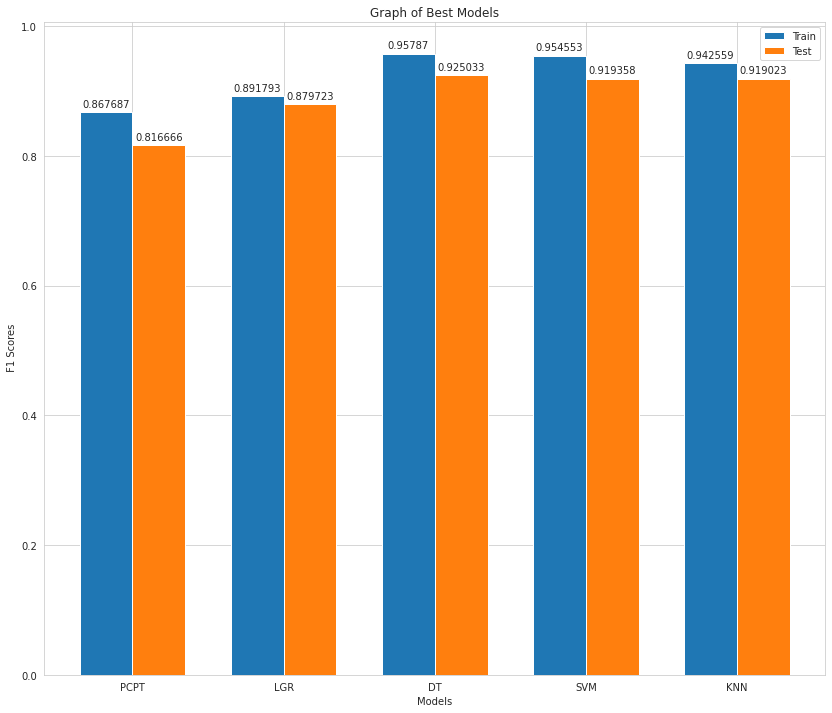

In [110]:
labels = ['PCPT', 'LGR', 'DT', 'SVM', 'KNN']


x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

train_score = []
test_score = []

for i in range(5):
  train_score.append(best_models[i]['features']['train_scores']['f1'])
  test_score.append(best_models[i]['new_scores']['f1'])

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, train_score, width, label='Train')
rects2 = ax.bar(x + width/2, test_score, width, label='Test')


ax.set_ylabel(' F1 Scores')
ax.set_xlabel('Models')
ax.set_title('Graph of Best Models')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
fig.set_size_inches(14,12)
ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)


plt.show()

35. Here we are finding the best overall model. The metric that we are using to choose the best model is the F1 score it is because the F1 score is the harmonic mean of precision and recall. Our goal is to have high recall and high precision, so taking the F1 score as the main evaluator solves the problem of choosing the best model.



In [97]:
best_train = 0
best_test = 0
i = 0
best_model_index = 0
for x in best_models:
  if x['features']['train_scores']['f1'] > best_train and x['new_scores']['f1'] > best_test:
    best_model_index = i
    best_train = x['features']['model_score']
    best_test = x['new_scores']['f1']
  i = i + 1

36. Here we are displaying the details of the overall best model 

In [98]:
best_models[best_model_index]

{'features': {'best_features': ['AC',
   'FM',
   'ASTV',
   'MSTV',
   'ALTV',
   'Mode',
   'Mean',
   'Variance'],
  'model_hyperparameters': {'criterion': 'gini',
   'max_depth': 7,
   'min_samples_leaf': 3,
   'min_samples_split': 2,
   'random_state': 20},
  'model_score': 0.9278528263123355,
  'train_scores': {'accuracy': 0.9583482857298575,
   'f1': 0.9578698323216801,
   'precision': 0.9578987345313688,
   'recall': 0.9583482857298575}},
 'model': DecisionTreeClassifier(max_depth=7, min_samples_leaf=3, random_state=20),
 'model_name': 'dt',
 'new_scores': {'acc': 0.9247572815533981,
  'f1': 0.9250327914537941,
  'pres': 0.9256243881181958,
  'recall': 0.9247572815533981}}

37. We have managed to find that the Decision Tree as the best model. Hence we are plotting the tree to see how it works.

In [99]:
from sklearn.tree import plot_tree, export_text
#plot_tree(model_dt)
print(export_text(best_models[best_model_index]['model'], feature_names=best_models[best_model_index]['features']['best_features']))

|--- MSTV <= -0.90
|   |--- ALTV <= 3.24
|   |   |--- ASTV <= 0.74
|   |   |   |--- Variance <= -0.45
|   |   |   |   |--- ALTV <= 2.78
|   |   |   |   |   |--- Mode <= 0.22
|   |   |   |   |   |   |--- class: 1.0
|   |   |   |   |   |--- Mode >  0.22
|   |   |   |   |   |   |--- FM <= -0.07
|   |   |   |   |   |   |   |--- class: 1.0
|   |   |   |   |   |   |--- FM >  -0.07
|   |   |   |   |   |   |   |--- class: 2.0
|   |   |   |   |--- ALTV >  2.78
|   |   |   |   |   |--- class: 2.0
|   |   |   |--- Variance >  -0.45
|   |   |   |   |--- class: 2.0
|   |   |--- ASTV >  0.74
|   |   |   |--- ASTV <= 1.91
|   |   |   |   |--- ALTV <= -0.13
|   |   |   |   |   |--- MSTV <= -1.01
|   |   |   |   |   |   |--- ALTV <= -0.29
|   |   |   |   |   |   |   |--- class: 1.0
|   |   |   |   |   |   |--- ALTV >  -0.29
|   |   |   |   |   |   |   |--- class: 1.0
|   |   |   |   |   |--- MSTV >  -1.01
|   |   |   |   |   |   |--- ALTV <= -0.34
|   |   |   |   |   |   |   |--- class: 1.0
|   |   |  

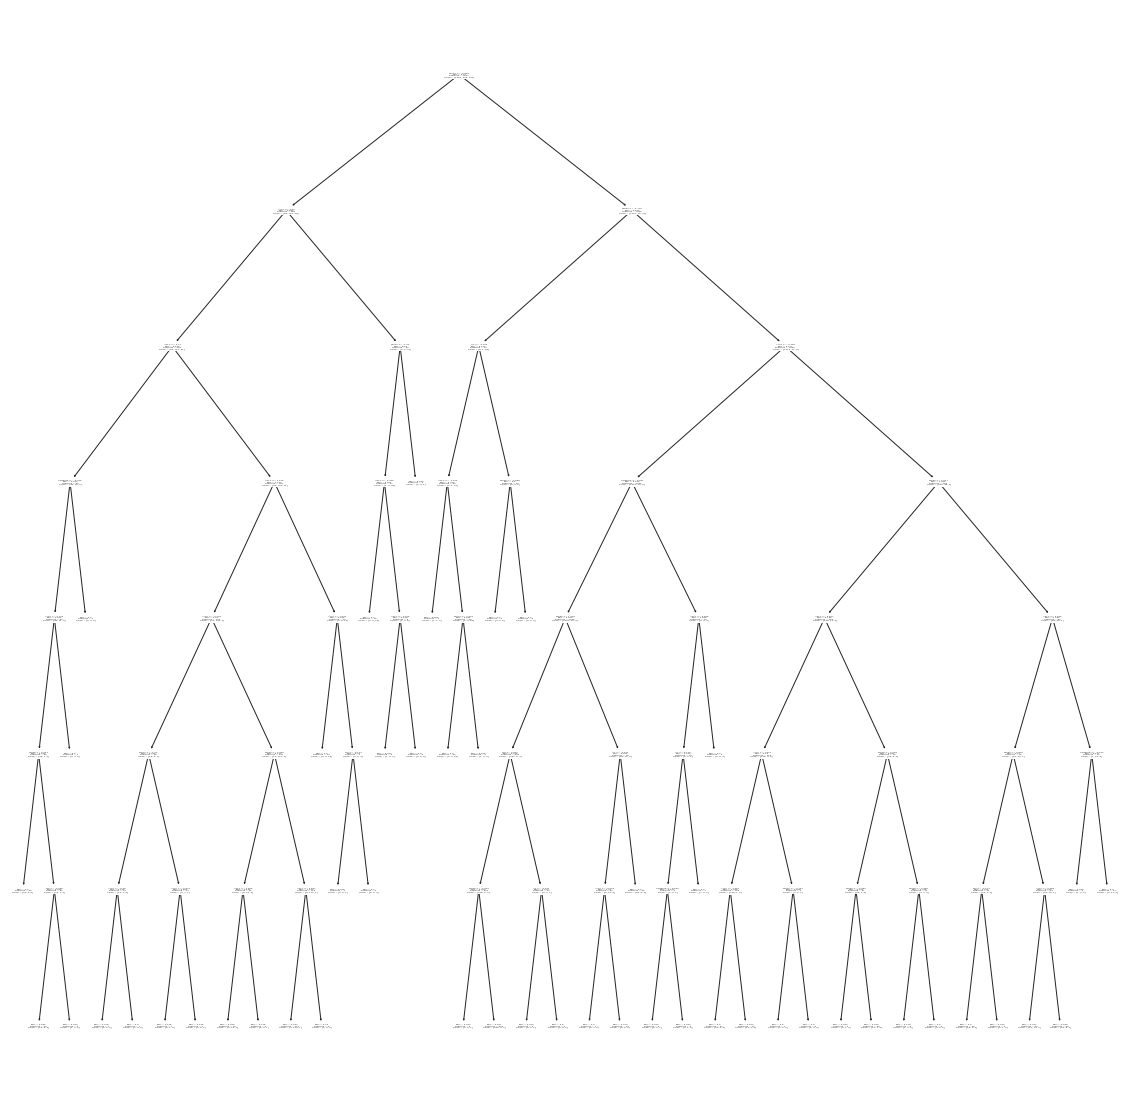

In [108]:
from matplotlib import pyplot as plt
plt.figure(figsize=(20,20)) # increase the value if the size of the image is too
plot_tree(best_models[best_model_index]['model'], feature_names=best_models[best_model_index]['features']['best_features'])
plt.show()

38. Below we are tabulating the results of the best models for different machine learning algorithm category.

In [101]:
final_train_scores = []
for x in range(len(best_models)):
  final_train_scores.append(best_models[x]['features']['train_scores'])

In [102]:
final_test_scores = []
for x in range(len(best_models)):
  final_test_scores.append(best_models[x]['new_scores'])

In [103]:
models = ["PCPT", "LGR", "DT", "SVM", "KNN"]
results_train = pd.DataFrame(final_train_scores, index=models)
results_test = pd.DataFrame(final_test_scores, index=models)

39. Below are the train scores of the different machine learning algorithm.

In [104]:
results_train

,accuracy,precision,recall,f1
PCPT,0.870913,0.870658,0.870913,0.867687
LGR,0.895810,0.890127,0.895810,0.891793
DT,0.958348,0.957899,0.958348,0.957870
SVM,0.955191,0.954398,0.955191,0.954553
KNN,0.943534,0.942454,0.943534,0.942559


40. Below are the test scores for the different machine learning algorithm.

In [105]:
results_test

,acc,pres,recall,f1
PCPT,0.827670,0.816565,0.827670,0.816666
LGR,0.885922,0.879738,0.885922,0.879723
DT,0.924757,0.925624,0.924757,0.925033
SVM,0.922330,0.919762,0.922330,0.919358
KNN,0.922330,0.920256,0.922330,0.919023
